# II- Supervised Learning Process

# 1- Load Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from datetime import datetime
import pytz
df = pd.read_pickle("C:/Users/rzouga/Downloads/Work Swiss/location-exploration/Recruitment-Challenge/locations.pkl")


# 2- Data Preparation

In [2]:

from sklearn.preprocessing import LabelEncoder
df['customerLocationState']=df.customerLocationState.str.replace('entrance','bigroom' ).replace('livingroom','bigroom')
le=LabelEncoder()
df['Location'] = le.fit_transform(df['customerLocationState'])
df['durationMinutes'] = df['duration'].dt.total_seconds()/60
# Convert to datetime and extract hour:
df['DateStart'] = pd.to_datetime(df['startTime']).dt.date
df['YearStart'] = pd.to_datetime(df['startTime']).dt.year
df['MonthStart'] = pd.to_datetime(df['startTime']).dt.month
df['weekStart'] = pd.to_datetime(df['startTime']).dt.week
df['DayStart'] = pd.to_datetime(df['startTime']).dt.day
df['WeekYear'] = df['startTime'].apply(lambda x: "%d/%d" % (x.week, x.year))
df['MonthYear'] = df['startTime'].apply(lambda x: "%d/%d" % (x.month, x.year))

# The day of the week with Monday=0, Sunday=6.
df['Dayofweekencoded'] = pd.to_datetime(df['startTime']).dt.dayofweek
df['Dayofweeknames'] = pd.to_datetime(df['startTime']).dt.day_name()
df['TimeStart'] = pd.to_datetime(df['startTime']).dt.time
df['hourStart'] = pd.to_datetime(df['startTime']).dt.hour
df['hourend'] = pd.to_datetime(df['endTime']).dt.hour
df['hourdiff'] = df['hourend']-df['hourStart']

df = df.sort_values(by='startTime',ascending=True)
df['total_freqbyday'] = df.groupby(['DateStart','customerLocationState'])['customerLocationState'].transform('count')
df['freq_cumbyday'] = df.groupby(['DateStart','customerLocationState'])['customerLocationState'].cumcount()+1
df['freq_cumbyHourofDay'] = df.groupby(['DateStart','customerLocationState','hourStart'])['customerLocationState'].cumcount()+1
df['freq_totalbyHourofDay'] = df.groupby(['DateStart','customerLocationState','hourStart'])['customerLocationState'].transform('count')
df['duration_cumusumbyday'] = df.groupby(['DateStart','customerLocationState'])['durationMinutes'].apply(lambda x: x.cumsum())
df['cumdurationlocationHourofDay'] = df.groupby(['DateStart','customerLocationState','hourStart'])['durationMinutes'].cumsum()
df['duration_totalsumbyday'] = df.groupby(['DateStart','customerLocationState'])['durationMinutes'].transform('sum')
df['event']= np.where((df['customerLocationState']!=df['customerLocationState'].shift())
                      ,df['customerLocationState'].shift()+'to'+df['customerLocationState'],'nochange')
df['Event_cumusumbyHourday'] = df.groupby(['DateStart','customerLocationState','event','hourStart'])['event'].cumcount()+1
df['Event_cumusumbyday'] = df.groupby(['DateStart','customerLocationState','event'])['event'].cumcount()+1
# convert categorical to integer 
la=LabelEncoder()
df=df.dropna()
df=df.drop_duplicates()
df['eventcoded'] = la.fit_transform(df['event'])
df.columns.values 

array(['customerLocationState', 'startTime', 'endTime', 'duration',
       'Location', 'durationMinutes', 'DateStart', 'YearStart',
       'MonthStart', 'weekStart', 'DayStart', 'WeekYear', 'MonthYear',
       'Dayofweekencoded', 'Dayofweeknames', 'TimeStart', 'hourStart',
       'hourend', 'hourdiff', 'total_freqbyday', 'freq_cumbyday',
       'freq_cumbyHourofDay', 'freq_totalbyHourofDay',
       'duration_cumusumbyday', 'cumdurationlocationHourofDay',
       'duration_totalsumbyday', 'event', 'Event_cumusumbyHourday',
       'Event_cumusumbyday', 'eventcoded'], dtype=object)

# Classifier
A Classifier in Machine Learning is an algorithm, that will determine the class to which the input data belongs to based on a set of features.

A Binary Classifier is an instance of Supervised Learning. In Supervised Learning we have a set of input data and a set of labels, our task is to map each data with a label. A Binary Classifier classifies elements into two groups, either Zero or One.



# 3- Label data 
we have unlabled data but we will annotate it with normal behavior and anormal behavior in the time of incident 
## 3-1 time of incident :

In [3]:
from datetime import datetime, timedelta,date, time
start_date = date(2019,9,18)
end_date = date(2019,9,19)
dfincident1=df[df['DateStart']==date(2019,9,18)]
dfincident1= dfincident1[dfincident1['hourStart']==10]
dfincident1

,customerLocationState,startTime,endTime,duration,Location,durationMinutes,DateStart,YearStart,MonthStart,weekStart,...,freq_cumbyday,freq_cumbyHourofDay,freq_totalbyHourofDay,duration_cumusumbyday,cumdurationlocationHourofDay,duration_totalsumbyday,event,Event_cumusumbyHourday,Event_cumusumbyday,eventcoded
38822,bigroom,2019-09-18 10:00:17+02:00,2019-09-18 10:01:35+02:00,00:01:18,2,1.300000,2019-09-18,2019,9,38,...,14,1,11,63.616667,1.300000,652.733333,nochange,1,10,18
38823,bigroom,2019-09-18 10:01:35+02:00,2019-09-18 10:09:03+02:00,00:07:28,2,7.466667,2019-09-18,2019,9,38,...,15,2,11,71.083333,8.766667,652.733333,nochange,2,11,18
38824,bigroom,2019-09-18 10:09:03+02:00,2019-09-18 10:09:55+02:00,00:00:52,2,0.866667,2019-09-18,2019,9,38,...,16,3,11,71.950000,9.633333,652.733333,nochange,3,12,18
38825,bigroom,2019-09-18 10:09:55+02:00,2019-09-18 10:13:07+02:00,00:03:12,2,3.200000,2019-09-18,2019,9,38,...,17,4,11,75.150000,12.833333,652.733333,nochange,4,13,18
38826,bathroom,2019-09-18 10:13:07+02:00,2019-09-18 10:18:54+02:00,00:05:47,0,5.783333,2019-09-18,2019,9,38,...,4,1,1,19.383333,5.783333,22.800000,bigroomtobathroom,1,3,9
38827,bigroom,2019-09-18 10:18:54+02:00,2019-09-18 10:20:29+02:00,00:01:35,2,1.583333,2019-09-18,2019,9,38,...,18,5,11,76.733333,14.416667,652.733333,bathroomtobigroom,1,3,1
38828,bigroom,2019-09-18 10:20:29+02:00,2019-09-18 10:33:36+02:00,00:13:07,2,13.116667,2019-09-18,2019,9,38,...,19,6,11,89.850000,27.533333,652.733333,nochange,5,14,18
38829,bigroom,2019-09-18 10:33:36+02:00,2019-09-18 10:44:10+02:00,00:10:34,2,10.566667,2019-09-18,2019,9,38,...,20,7,11,100.416667,38.100000,652.733333,nochange,6,15,18
38830,bigroom,2019-09-18 10:44:10+02:00,2019-09-18 10:53:50+02:00,00:09:40,2,9.666667,2019-09-18,2019,9,38,...,21,8,11,110.083333,47.766667,652.733333,nochange,7,16,18
38831,bigroom,2019-09-18 10:53:50+02:00,2019-09-18 10:54:41+02:00,00:00:51,2,0.850000,2019-09-18,2019,9,38,...,22,9,11,110.933333,48.616667,652.733333,nochange,8,17,18


In [4]:
dfincident2=df[df['DateStart']==date(2019,9,19)]
dfincident2=dfincident2[dfincident2['hourStart']==2]
dfincident2

,customerLocationState,startTime,endTime,duration,Location,durationMinutes,DateStart,YearStart,MonthStart,weekStart,...,freq_cumbyday,freq_cumbyHourofDay,freq_totalbyHourofDay,duration_cumusumbyday,cumdurationlocationHourofDay,duration_totalsumbyday,event,Event_cumusumbyHourday,Event_cumusumbyday,eventcoded
38883,bathroom,2019-09-19 02:34:59+02:00,2019-09-19 02:43:43+02:00,0 days 00:08:44,0,8.733333,2019-09-19,2019,9,38,...,1,1,2,8.733333,8.733333,16.233333,bedroomtobathroom,1,1,4
38884,bigroom,2019-09-19 02:43:43+02:00,2019-09-19 02:46:27+02:00,0 days 00:02:44,2,2.733333,2019-09-19,2019,9,38,...,1,1,1,2.733333,2.733333,2.733333,bathroomtobigroom,1,1,1
38885,bathroom,2019-09-19 02:46:27+02:00,2019-09-19 02:53:57+02:00,0 days 00:07:30,0,7.500000,2019-09-19,2019,9,38,...,2,2,2,16.233333,16.233333,16.233333,bigroomtobathroom,1,1,9
38886,bedroom,2019-09-19 02:53:57+02:00,2019-09-20 10:25:18+02:00,1 days 07:31:21,1,1891.350000,2019-09-19,2019,9,38,...,1,1,1,1891.350000,1891.350000,1891.350000,bathroomtobedroom,1,1,0


# 3-2 Annotate Data 

In [5]:
df['behavior']= np.where(((df['DateStart']==date(2019,9,19))&(df['hourStart']==2))|((df['DateStart']==date(2019,9,18))&(df['hourStart']==10))
                          ,1,0)

In [6]:
dfincident2=df[df['DateStart']==date(2019,9,19)]
dfincident2=dfincident2[dfincident2['hourStart']==2]
dfincident2['behavior']

38883    1
38884    1
38885    1
38886    1
Name: behavior, dtype: int32

In [7]:
from datetime import datetime, timedelta,date, time
start_date = date(2019,9,18)
end_date = date(2019,9,19)
dfincident1=df[df['DateStart']==date(2019,9,18)]
dfincident1= dfincident1[dfincident1['hourStart']==10]
dfincident1['behavior']

38822    1
38823    1
38824    1
38825    1
38826    1
38827    1
38828    1
38829    1
38830    1
38831    1
38832    1
38833    1
Name: behavior, dtype: int32



**Note**: Notice how imbalanced is our original dataset! Most of the transactions are Normal. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most behavior are not Anomaly. But we don't want our model to assume, we want our model to detect patterns that give signs of Anomaly!


In [20]:
df['behavior'].value_counts()[1]

16

In [18]:
# The classes are heavily skewed we need to solve this issue later.
print('Normal Behavior', round(df['behavior'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Anomaly Behavior', round(df['behavior'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Normal Behavior 99.96 % of the dataset
Anomaly Behavior 0.04 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: Normal Behavior || 1: Anomaly behavior)')

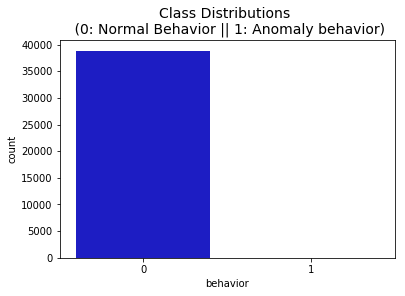

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = ["#0101DF", "#DF0101"]

sns.countplot('behavior', data=df, palette=colors)
plt.title('Class Distributions \n (0: Normal Behavior || 1: Anomaly behavior)', fontsize=14)

In [22]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
Anomaly_df = df.loc[df['behavior'] == 1]
Normal_df = df.loc[df['behavior'] == 0][:16]

normal_distributed_df = pd.concat([Anomaly_df, Normal_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Location,durationMinutes,hourStart,freq_cumbyday,freq_cumbyHourofDay,Event_cumusumbyHourday,Event_cumusumbyday,eventcoded,behavior
38317,2,10.050000,13,38,5,4,30,18,0
38883,0,8.733333,2,1,1,1,1,4,1
36088,2,17.166667,7,14,3,1,7,18,0
9438,2,8.683333,1,1,1,1,1,5,0
38824,2,0.866667,10,16,3,3,12,18,1



## Equally Distributing and Correlating:

Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: behavior, dtype: float64


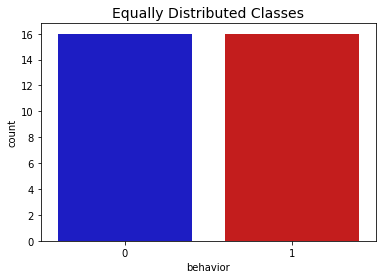

In [24]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['behavior'].value_counts()/len(new_df))



sns.countplot('behavior', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

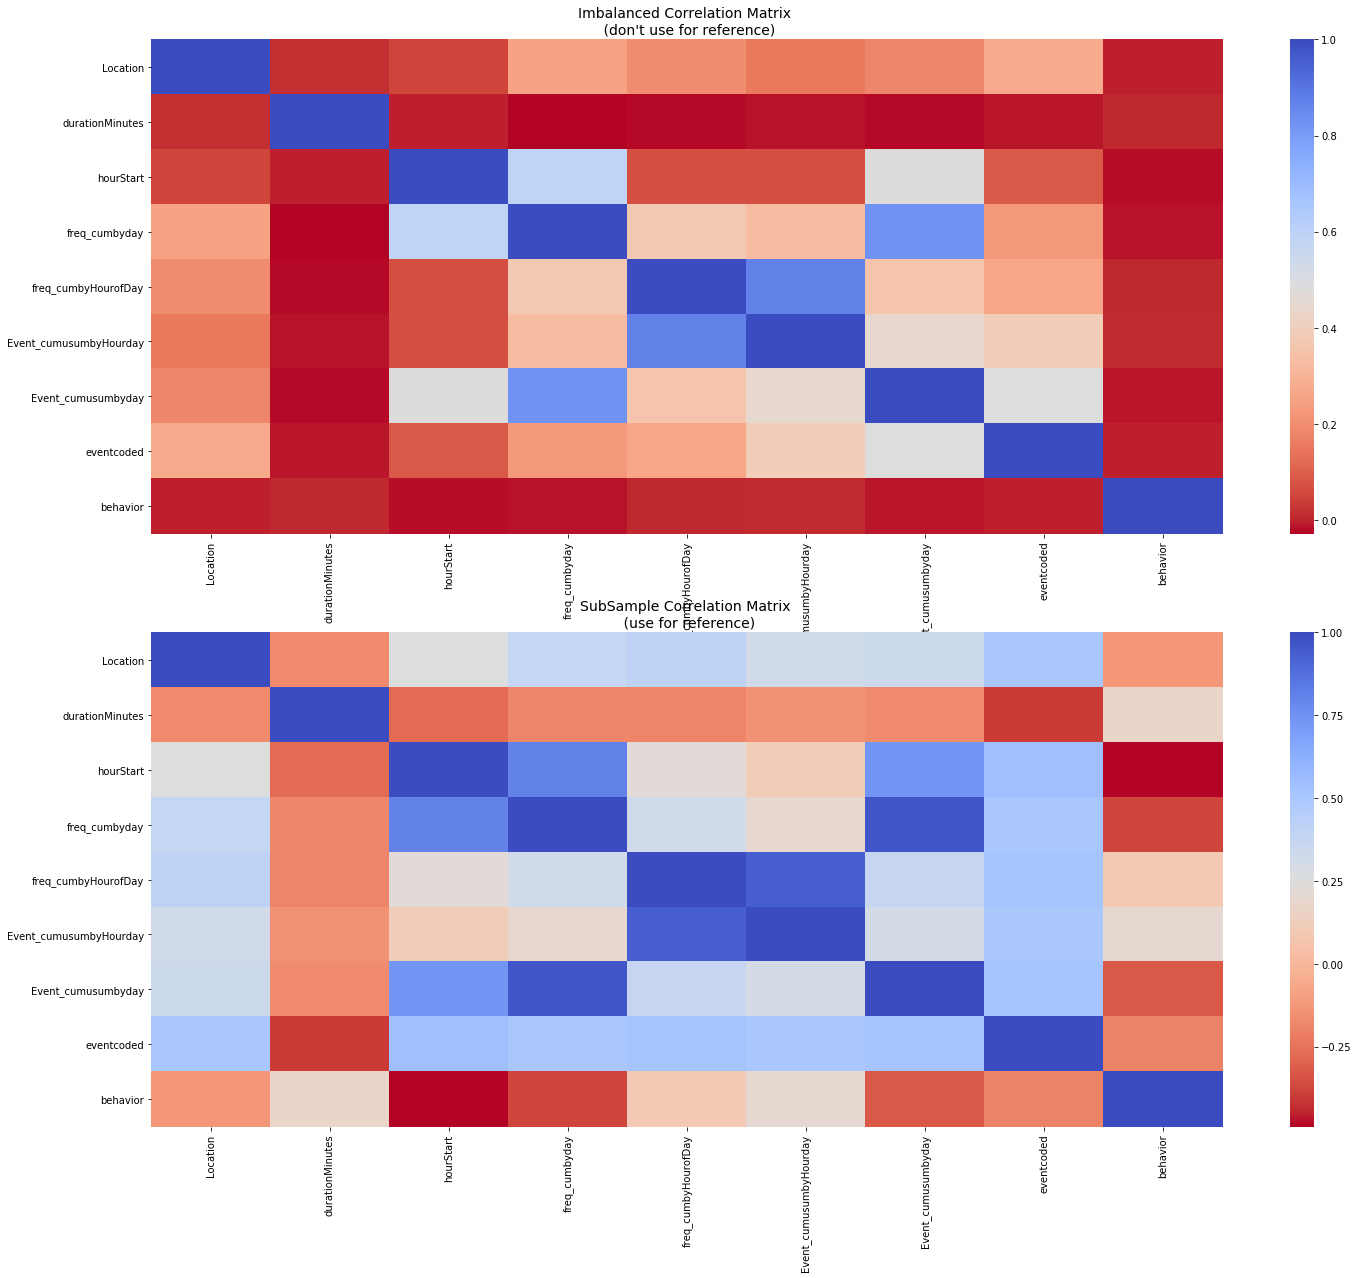

In [25]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

# I-Balanced Data 

In [51]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import collections
# Undersampling before cross validating (prone to overfit)
X1 = new_df.drop('behavior', axis=1)
y1 = new_df['behavior']
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

X1= scaler.fit_transform(X1)

# This is explicitly used for undersampling.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "NBClassifier": BernoulliNB(),
    "XGBoostClassifier": XGBClassifier()
}
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train1, y_train1)
    training_score = cross_val_score(classifier, X_train1, y_train1, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


Classifiers:  LogisticRegression Has a training score of 48.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 40.0 % accuracy score
Classifiers:  SVC Has a training score of 40.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 68.0 % accuracy score
Classifiers:  BernoulliNB Has a training score of 56.00000000000001 % accuracy score
Classifiers:  XGBClassifier Has a training score of 60.0 % accuracy score


In [58]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train1, y_train1)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train1, y_train1)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train1, y_train1)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train1, y_train1)

# tree best estimator
tree_clf = grid_tree.best_estimator_
# A parameter grid for XGBoost
XGBoost_params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid_XGBoost = GridSearchCV(XGBClassifier(), XGBoost_params)
grid_XGBoost.fit(X_train1, y_train1)
# XGboost best estimator
XGBoost_clf = grid_XGBoost.best_estimator_

In [61]:
# Overfitting Case
log_reg_score = cross_val_score(log_reg, X_train1, y_train1, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train1, y_train1, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train1, y_train1, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train1, y_train1, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

XGBoost_score = cross_val_score(XGBoost_clf, X_train1, y_train1, cv=5)
print('XGBoost Classifier Cross Validation Score', round(XGBoost_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  60.0%
Knears Neighbors Cross Validation Score 72.0%
Support Vector Classifier Cross Validation Score 68.0%
DecisionTree Classifier Cross Validation Score 44.0%
XGBoost Classifier Cross Validation Score 68.0%


In [95]:
grid_knears.best_params_

{'algorithm': 'auto', 'n_neighbors': 3}

In [96]:
y_pred_classtratified = knears_neighbors.predict(X_test1)


In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1,  y_pred_classtratified)
print(confusion_matrix)

[[2 2]
 [0 3]]


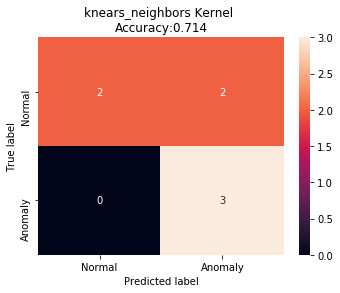

In [98]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['Normal','Anomaly'], 
                     columns = ['Normal','Anomaly'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('knears_neighbors Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test1, y_pred_classtratified)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# II-Unbalanced Data  :

## Select features and target 

In [99]:
df=df[[ 'Location', 'durationMinutes','hourStart',
         'freq_cumbyday',
       'freq_cumbyHourofDay', 
       'Event_cumusumbyHourday', 'Event_cumusumbyday' ,'eventcoded','behavior']]
# select features
X=df.iloc[:,0:-1]
#select Target :behavior 
y=df.iloc[:,-1]


# 4. Train Models
**Classifiers :**

In this section we will train some types of classifiers and decide which classifier will be more effective in detecting Anomaly Behavior. Before we have to split our data into training and testing sets and separate the features from the labels
## 4.1 Scaling Features:

When you’re working with a learning model, it is important to scale the features to a range which is centered around zero. Scaling will make sure the variance of the features are in the same range

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

X= scaler.fit_transform(X)

##  4.2 best features

In [101]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.iloc[:,0:9].columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                 Features     Score
2               hourStart  1.509748
3           freq_cumbyday  1.357467
6      Event_cumusumbyday  0.821248
5  Event_cumusumbyHourday  0.437707
1         durationMinutes  0.133812
4     freq_cumbyHourofDay  0.112346
0                Location  0.052161
7              eventcoded  0.008360


## 4.3 Model:XGBoost

XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting algorithm. What differentiates it from other boosting algorithms is its speed and accuracy Extreme Gradient Boosting (XGBoost) is a more efficient version of gradient boosting framework containing both a linear model solver and tree learning algorithms.

The reason behind it’s efficiency is it’s capacity to do parallel computing on a single machine.


In [102]:
X.shape

(38862, 8)

In [103]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,random_state=1)

#X_train=X[0:36000,:]
#X_test=X[36000:38861,:]
#y_train=y[0:36000]
#y_test =y[36000:38861]
import xgboost
classifier = xgboost.XGBClassifier()
classifier.fit( X_train, y_train.ravel())


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [104]:
# examine class distribution
unique, counts = np.unique(y_test, return_counts=True)
print( np.asarray((unique, counts)))

[[    0     1]
 [19421    10]]


[0.         0.11407334 0.2081415  0.21525678 0.00158949 0.09170785
 0.369231   0.        ]


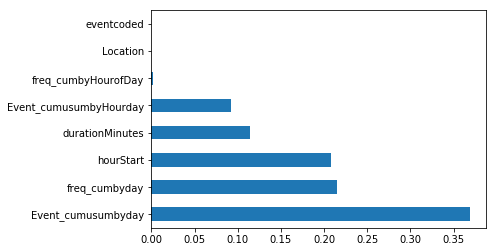

In [105]:
import matplotlib.pyplot as plt

print(classifier.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(classifier.feature_importances_, index=df.iloc[:,0:8].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [106]:
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")
# make predictions for test data
y_pred_class1 = classifier.predict(X_test)
y_pred=classifier.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_class1, normalize=True)
print('Test accuracy score:',accuracy)
print('Train accuracy score:',accuracy_score(y_train,classifier.predict(X_train)))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_class1 ,pos_label='positive',
                                           average='micro')
print('F1 score: %f' % f1)

Test accuracy score: 0.999485358447841
Train accuracy score: 0.9996912150687046
F1 score: 0.999485


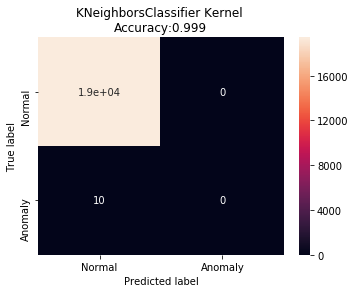

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test,  y_pred_class1)
# Transform to df for easier plotting
cm_df1 = pd.DataFrame(confusion_matrix1,
                     index = ['Normal','Anomaly'], 
                     columns = ['Normal','Anomaly'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df1, annot=True)
plt.title('KNeighborsClassifier Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_class1)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# comprare our XGBoost trained in balanced data 

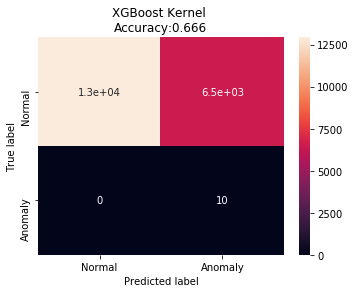

In [126]:

# make predictions for test data
y_pred_class11 = XGBoost_clf.predict(X_test)
confusion_matrix11 = confusion_matrix(y_test,  y_pred_class11)
# Transform to df for easier plotting
cm_df11 = pd.DataFrame(confusion_matrix11,
                     index = ['Normal','Anomaly'], 
                     columns = ['Normal','Anomaly'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df11, annot=True)
plt.title('XGBoost Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_class11)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Note:** As we see Accuracy have reduced to 66% but it detect well our anomaly 

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19421
           1       0.00      0.00      0.00        10

    accuracy                           1.00     19431
   macro avg       0.50      0.50      0.50     19431
weighted avg       1.00      1.00      1.00     19431



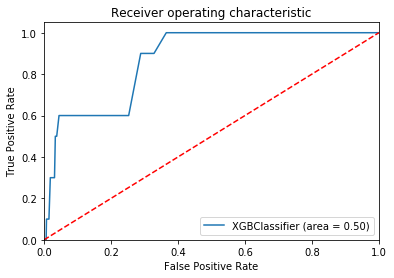

In [109]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBClassifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [110]:
# examine class distribution
unique, counts = np.unique(y_pred_class1, return_counts=True)
print( np.asarray((unique, counts)))

[[    0]
 [19431]]


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression( multi_class='ovr', solver='newton-cg')
logreg.fit(X_train,y_train)
y_pred2 = logreg.predict(X_train)
y_pred_class2=logreg.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train,y_pred2))
print('Test accuracy score:', accuracy_score(y_test,logreg.predict(X_test)))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_class2,pos_label='positive',
                                           average='micro')
print('F1 score: %f' % f1)

Train accuracy score: 0.9996912150687046
Test accuracy score: 0.999485358447841
F1 score: 0.999485


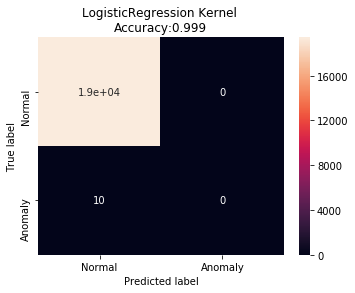

In [129]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test,  y_pred_class2)
# Transform to df for easier plotting
cm_df2 = pd.DataFrame(confusion_matrix2,
                     index = ['Normal','Anomaly'], 
                     columns = ['Normal','Anomaly'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df2, annot=True)
plt.title('LogisticRegression Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_class2)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [113]:
# examine class distribution
unique, counts = np.unique(y_pred_class2, return_counts=True)
print( np.asarray((unique, counts)))

[[    0]
 [19431]]


In [114]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc_b = RFC()
rfc_b.fit(X_train,y_train)
y_pred3 = rfc_b.predict(X_train)
y_pred_class3 = rfc_b.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train,y_pred3))
print('Test accuracy score:', accuracy_score(y_test,rfc_b.predict(X_test)))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_class3,pos_label='positive',
                                           average='micro')
print('F1 score: %f' % f1)

Train accuracy score: 1.0
Test accuracy score: 0.999485358447841
F1 score: 0.999485


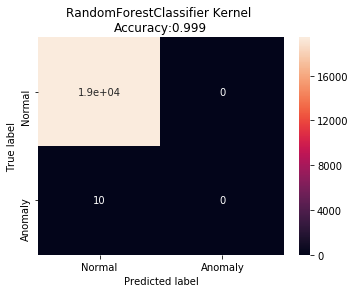

In [128]:
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(y_test, y_pred_class3)
# Transform to df for easier plotting
cm_df3 = pd.DataFrame(confusion_matrix3,
                     index = ['Normal','Anomaly'], 
                     columns = ['Normal','Anomaly'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df3, annot=True)
plt.title('RandomForestClassifier Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_class3)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [116]:
# examine class distribution
unique, counts = np.unique(y_pred_class3, return_counts=True)
print( np.asarray((unique, counts)))

[[    0]
 [19431]]


In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(1)
knn.fit(X_train,y_train)
y_pred4 = knn.predict(X_train)
y_pred_class4=knn.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train,y_pred4))
print('Test accuracy score:',accuracy_score(y_test,knn.predict(X_test)))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_class4,pos_label='positive',
                                           average='micro')
print('F1 score: %f' % f1)

Train accuracy score: 1.0
Test accuracy score: 0.9991251093613298
F1 score: 0.999125


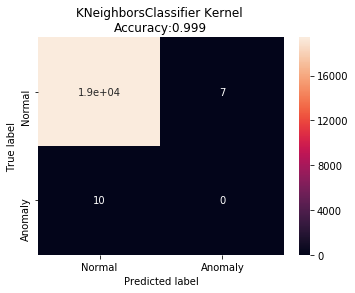

In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix4 = confusion_matrix(y_test, y_pred_class4)
# Transform to df for easier plotting
cm_df4 = pd.DataFrame(confusion_matrix4,
                     index = ['Normal','Anomaly'], 
                     columns = ['Normal','Anomaly'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df4, annot=True)
plt.title('KNeighborsClassifier Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_class4)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# compare our KNeighborsClassifier  trained in balanced data 

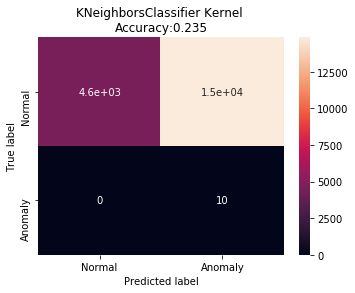

In [124]:
#let's compare result:
y_pred_class41 = knears_neighbors.predict(X_test)
confusion_matrix41 = confusion_matrix(y_test, y_pred_class41)
# Transform to df for easier plotting
cm_df41 = pd.DataFrame(confusion_matrix41,
                     index = ['Normal','Anomaly'], 
                     columns = ['Normal','Anomaly'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df41, annot=True)
plt.title('KNeighborsClassifier Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_class41)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [119]:
# examine class distribution
unique, counts = np.unique(y_pred_class4, return_counts=True)
print( np.asarray((unique, counts)))

[[    0     1]
 [19424     7]]


In [120]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
B = BernoulliNB()

%time B.fit(X_train,y_train)
y_pred_classB = B.predict(X_test)

accuracy_score(y_test, y_pred_classB)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_classB,pos_label='pos_label',labels=[0,1],
                                           average='micro')
print('F1 score: %f' % f1)

Wall time: 31.2 ms
F1 score: 0.999485


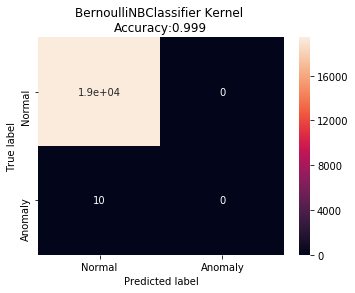

In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix5 = confusion_matrix(y_test,  y_pred_classB)
# Transform to df for easier plotting
cm_df5 = pd.DataFrame(confusion_matrix5,
                     index = ['Normal','Anomaly'], 
                     columns = ['Normal','Anomaly'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df5, annot=True)
plt.title('BernoulliNBClassifier Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_classB)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [122]:
# examine class distribution
unique, counts = np.unique(y_pred_classB, return_counts=True)
print( np.asarray((unique, counts)))

[[    0]
 [19431]]


# Summary:

-Both training in unblanced and balanced don't give us a promoted results

    KNeighborsClassifier and XGBoost classifier are  more accurate than the other three classifiers in most cases for balanced data .
    GridSearchCV is used to determine the paremeters that gives the best predictive score for the classifiers.
    XGBoost  has the best Receiving Operating Characteristic score (ROC), meaning that XGBoost pretty accurately separates Anomaly and non-Anomly behavior.
    
==>Those models can't be used for other data set beacause we have a so unblanced data : only 0.04 anomaly .